In [1]:
from fbprophet import Prophet

In [59]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 1000
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 1) Data Processing

In [82]:
sale = pd.read_pickle('sale_no_re.pkl')

In [ ]:
#df.loc[df['column_name'] == some_value]

In [ ]:
#DTA4E2531JET upward trend
#DTA4E2531IV downward trend
#DTA4E2531GRY

In [158]:
sample = sale.loc[sale['Style_Color'] == 'DTA4E2531GRY']

In [159]:
sample.head()

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
23884,DTA4E2531,GRY,wire tassel hook er,AAG001,2018-08-10,12,3.75,$ 45.00,NaN,IMPORT,NOBLES,MS,39047,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,8,DTA4E2531GRY,45.0
23885,DTA4E2531,GRY,wire tassel hook er,ACC012,2018-05-25,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,5,DTA4E2531GRY,42.0
23886,DTA4E2531,GRY,wire tassel hook er,ACC019,2017-07-27,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,7,DTA4E2531GRY,42.0
23887,DTA4E2531,GRY,wire tassel hook er,ACC019,2017-12-15,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,12,DTA4E2531GRY,42.0
23888,DTA4E2531,GRY,wire tassel hook er,ACC019,2018-01-30,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,1,DTA4E2531GRY,42.0


In [160]:
sample_period = pd.DataFrame(sample.groupby(['INVC DATE', 'Style_Color'])['QTY'].sum()).reset_index()

In [161]:
sample_period.describe()

,QTY
count,97.000000
mean,54.505155
std,91.178411
min,12.000000
25%,12.000000
50%,36.000000
75%,60.000000
max,828.000000


In [162]:
sample_period.head()

,INVC DATE,Style_Color,QTY
0,2017-07-10,DTA4E2531GRY,36
1,2017-07-11,DTA4E2531GRY,144
2,2017-07-14,DTA4E2531GRY,60
3,2017-07-25,DTA4E2531GRY,60
4,2017-07-26,DTA4E2531GRY,96


In [163]:
sample_period = sample_period.drop('Style_Color', axis = 1)

### 2) Data Transformation

In [164]:
sample_period = sample_period.rename(columns={'INVC DATE': 'ds'})

In [165]:
#sample_period['QTY'] = sample_period['QTY'].apply(lambda x: int(x))

In [166]:
sample_period.head()

,ds,QTY
0,2017-07-10,36
1,2017-07-11,144
2,2017-07-14,60
3,2017-07-25,60
4,2017-07-26,96


In [167]:
sample_period = sample_period.rename(columns={'QTY':'y'})

In [168]:
#sample_period = sample_period.reset_index()

In [169]:
#sample_period.apply(lambda x: float(x))

In [170]:
#sample_period.set_index('ds')

In [171]:
sample_period.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [172]:
m = Prophet()
m.fit(sample_period)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Bird_\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [173]:
future = m.make_future_dataframe(periods=180)

In [174]:
future.head()

,ds
0,2017-07-10
1,2017-07-11
2,2017-07-14
3,2017-07-25
4,2017-07-26


#### 3) Forecasting Result

In [175]:
forecast = m.predict(future)
forecast[['ds', 'yhat']]

,ds,yhat
0,2017-07-10,52.695831
1,2017-07-11,75.338931
2,2017-07-14,96.545306
3,2017-07-25,74.138082
4,2017-07-26,64.533628
5,2017-07-27,69.230852
6,2017-08-03,68.630427
7,2017-08-08,72.937232
8,2017-08-11,94.143607
9,2017-08-15,72.336807


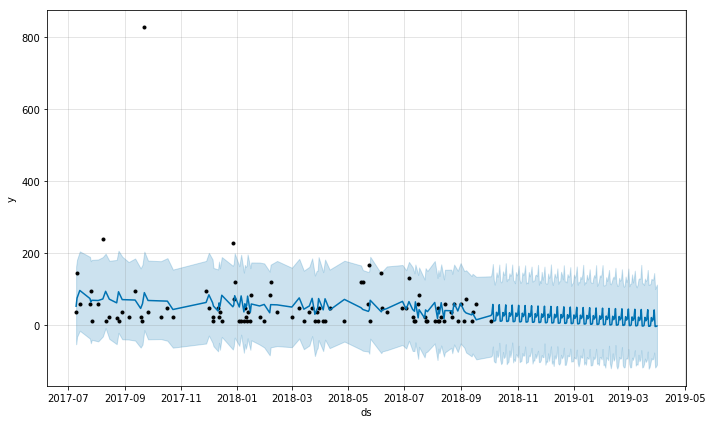

In [176]:
fig1 = m.plot(forecast)

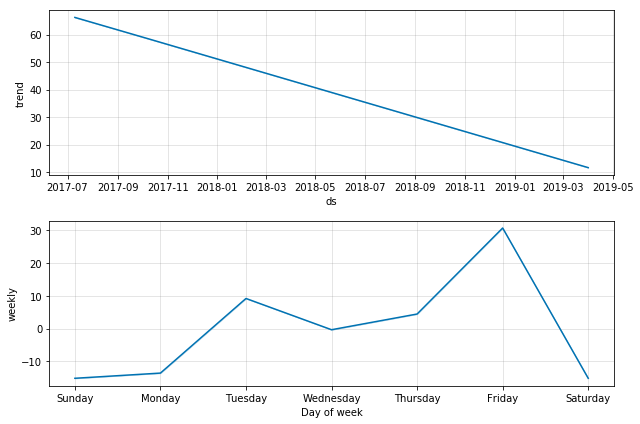

In [177]:
fig2 = m.plot_components(forecast)

In [178]:
metric_df = forecast.set_index('ds')[['yhat']].join(sample_period.set_index('ds').y).reset_index()

In [179]:
metric_df.dropna(inplace=True)

### 4) Model Evaluation

In [180]:
r2_score(metric_df.y, metric_df.yhat)

0.04931507927522305

In [181]:
mean_squared_error(metric_df.y, metric_df.yhat)

7822.041935172917

##### This number makes sense because we didn't standardize any value.

In [182]:
mean_absolute_error(metric_df.y, metric_df.yhat)

43.576184621785416

For this model / data, the MAE turns out to be 43.58. It tells that for each data point, my average magnitude of error is roughly ~43.58 units off.

### 5) Experiment: Stardardized the Quantity Value

In [138]:
sample_period2 = sample_period.copy()

In [139]:
sample_period2['y'] = sample_period2['y'].apply(lambda x: np.log(x))

In [140]:
sample_period2.head()

,ds,y
0,2017-07-10,3.583519
1,2017-07-11,4.969813
2,2017-07-14,4.094345
3,2017-07-25,4.094345
4,2017-07-26,4.564348


In [141]:
m2 = Prophet()
m2.fit(sample_period2)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Bird_\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [142]:
future2 = m2.make_future_dataframe(periods=365)

In [143]:
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat']].head()

,ds,yhat
0,2017-07-10,3.533586
1,2017-07-11,3.990844
2,2017-07-14,3.793135
3,2017-07-25,3.974447
4,2017-07-26,3.557899


In [144]:
metric_df2 = forecast2.set_index('ds')[['yhat']].join(sample_period2.set_index('ds').y).reset_index()
metric_df2.dropna(inplace=True)

In [145]:
r2_score(metric_df2.y, metric_df2.yhat)

0.05900075958401452

In [146]:
#forecast2['yhat'] = forecast2['yhat'].apply(lambda x: np.exp(x))

In [147]:
forecast2[['ds','yhat']].head()

,ds,yhat
0,2017-07-10,34.246562
1,2017-07-11,54.100547
2,2017-07-14,44.395375
3,2017-07-25,53.220663
4,2017-07-26,35.089380


In [148]:
mean_squared_error(metric_df2.y, metric_df2.yhat)

0.7695256435031637

In [149]:
mean_absolute_error(metric_df.y, metric_df.yhat)

43.576184621785416

### 6) Improve model

In [118]:
whole_sale = pd.DataFrame(sale.groupby(['INVC DATE', 'Style_Color'])['QTY'].sum()).reset_index()
whole_sale.head()

,INVC DATE,Style_Color,QTY
0,2016-01-04,DTAB1197BRN,180
1,2016-01-04,DTAB1197JET,180
2,2016-01-04,DTAB1197WHT,180
3,2016-01-04,DTAB1286GD-GRY,12
4,2016-01-04,DTAB1469GD-AQ,12


In [119]:
whole_sale['y'] = 0

In [121]:
whole_sale.loc[whole_sale['Style_Color'] == 'DTA4E2531GRY', 'num'] = whole_sale['QTY']

In [123]:
whole_sale['num'] = whole_sale['num'].fillna(0)

In [127]:
whole_sale

,INVC DATE,Style_Color,QTY,y,num
0,2016-01-04,DTAB1197BRN,180,0,0.0
1,2016-01-04,DTAB1197JET,180,0,0.0
2,2016-01-04,DTAB1197WHT,180,0,0.0
3,2016-01-04,DTAB1286GD-GRY,12,0,0.0
4,2016-01-04,DTAB1469GD-AQ,12,0,0.0
5,2016-01-04,DTAB1469GD-BL,12,0,0.0
6,2016-01-04,DTAB1469GD-PK,12,0,0.0
7,2016-01-04,DTAB1469SV-AQ,12,0,0.0
8,2016-01-04,DTAB1469SV-BL,12,0,0.0
9,2016-01-04,DTAB1469SV-TQ,12,0,0.0


In [129]:
del(whole_sale['Style_Color'])
del(whole_sale['QTY'])
del(whole_sale['y'])

In [133]:
whole_sale = whole_sale.rename(columns={'INVC DATE': 'ds',
                                             'num':'y'})

In [134]:
whole_sale.head()

,ds,y
0,2016-01-04,0.0
1,2016-01-04,0.0
2,2016-01-04,0.0
3,2016-01-04,0.0
4,2016-01-04,0.0


In [135]:
m3 = Prophet()
m3.fit(whole_sale)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Bird_\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [136]:
future3 = m3.make_future_dataframe(periods=365)

In [150]:
forecast3 = m3.predict(future3)
forecast3[['ds', 'yhat']].head()

,ds,yhat
0,2016-01-04,0.000769
1,2016-01-04,0.000769
2,2016-01-04,0.000769
3,2016-01-04,0.000769
4,2016-01-04,0.000769


In [151]:
metric_df3 = forecast3.set_index('ds')[['yhat']].join(whole_sale.set_index('ds').y).reset_index()
metric_df3.dropna(inplace=True)

In [152]:
r2_score(metric_df3.y, metric_df3.yhat)

0.0007517662103939671

In [154]:
mean_squared_error(metric_df3.y, metric_df3.yhat)

10.679804623995667

In [156]:
mean_absolute_error(metric_df3.y, metric_df3.yhat)

0.15683438958312926

#### IT GOT WORSE!